In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mdtraj as md
import freud
from sklearn.decomposition import PCA

In [29]:
def getRDF(trj_obj_atom_slice):
    rdf = freud.density.RDF(bins=100, r_max=1)
    for system in zip(np.asarray(trj_obj_atom_slice.unitcell_vectors), trj_obj_atom_slice.xyz):
        rdf.compute(system=system, reset=False)
    return rdf

In [40]:
waters_rdf = getRDF(waters_only)

In [19]:
NA_waters_rdf = getRDF(NA_water_trj)

In [31]:
CL_waters_rdf = getRDF(CL_water_trj)

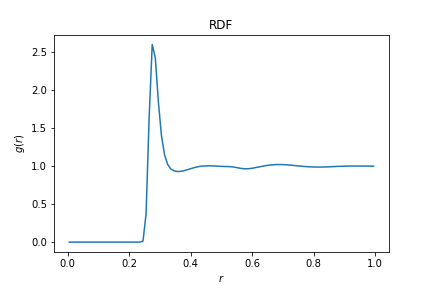

<Figure size 432x288 with 0 Axes>

In [41]:
waters_rdf

In [5]:
ClO_pairs = trj.top.select_pairs("name CL", "name O")
ClH_pairs = trj.top.select_pairs("name CL", "name H1 or name H2")

ClO_bin_centers, ClO_values = md.compute_rdf(trj, ClO_pairs, n_bins=100)
ClH_bin_centers, ClH_values = md.compute_rdf(trj, ClH_pairs, n_bins=100)

In [8]:
Cl_water_values = (ClO_values + ClH_values)/2

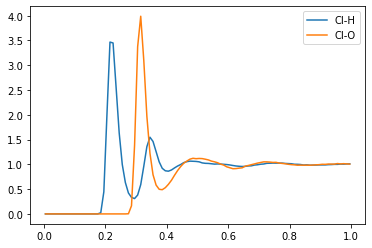

In [10]:
plt.plot(ClH_bin_centers, ClH_values, label="Cl-H")
plt.plot(ClO_bin_centers, ClO_values, label="Cl-O")
plt.legend()

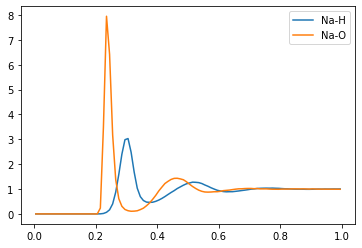

In [11]:
plt.plot(NaH_bin_centers, NaH_values, label="Na-H")
plt.plot(NaO_bin_centers, NaO_values, label="Na-O")
plt.legend()

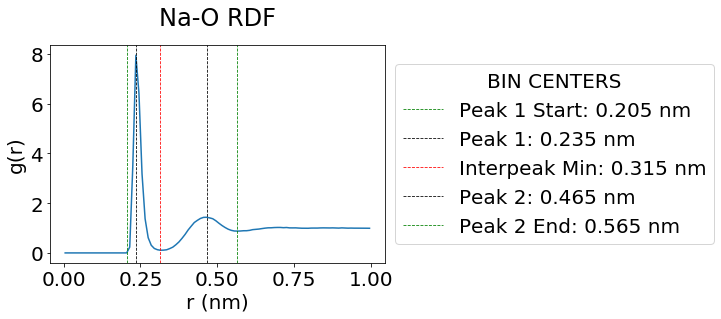

In [137]:
plt.plot(NaO_bin_centers, NaO_values)

pk1_indx = np.where(NaO_values == max(NaO_values))[0]
pk1_max = NaO_bin_centers[pk1_indx][0]

pk2_indx = np.where(NaO_values == max(NaO_values[40:]))[0]
pk2_max = NaO_bin_centers[pk2_indx][0]

pk12_min = NaO_bin_centers[np.where(NaO_values == min(NaO_values[pk1_indx[0]:pk2_indx[0]]))][0]

#nzero_indx = np.nonzero(NaO_values)
#closest_val = NaO_bin_centers[nzero_indx[0][0]]
closest_val = NaO_bin_centers[np.where(NaO_values > 0.1)[0]-1][0]

pk2_end_indx = np.where(NaO_values == min(NaO_values[pk2_indx[0]:]))[0]
pk2_end = NaO_bin_centers[pk2_end_indx][0]

plt.axvline(x=closest_val, color="green", lw=0.8, ls='--', label="Peak 1 Start: %1.3f nm" %closest_val)
plt.axvline(x=pk1_max, color="black", lw=0.8, ls='--', label="Peak 1: %1.3f nm" %pk1_max)
plt.axvline(x=pk12_min, color="red", lw=0.8, ls='--', label="Interpeak Min: %1.3f nm" %pk12_min)
plt.axvline(x=pk2_max, color="black", lw=0.8, ls='--', label="Peak 2: %1.3f nm" %pk2_max)
plt.axvline(x=pk2_end, color="green", lw=0.8, ls='--', label="Peak 2 End: %1.3f nm" %pk2_end)


plt.rcParams.update({'font.size': 20})
plt.title("Na-O RDF", pad=20)
plt.xlabel("r (nm)")
plt.ylabel("g(r)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop = {'size': 20}, title="BIN CENTERS")

In [110]:
NaH_values

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.74689017e-04, 3.22932932e-03, 1.80789202e-02, 6.50966391e-02,
       1.65568626e-01, 4.02402934e-01, 8.77225102e-01, 1.58926072e+00,
       2.39894676e+00, 2.98470640e+00, 3.03136716e+00, 2.48299937e+00,
       1.68136848e+00, 1.03607658e+00, 6.94652840e-01, 5.39432340e-01,
       4.75120692e-01, 4.65401226e-01, 4.69758491e-01, 5.05411300e-01,
       5.57085763e-01, 6.21925175e-01, 6.97620529e-01, 7.81021737e-01,
       8.61663767e-01, 9.35535384e-01, 1.01966647e+00, 1.08699757e+00,
       1.15393530e+00, 1.21072097e+00, 1.24422995e+00, 1.27754931e+00,
       1.27134746e+00, 1.25894137e+00, 1.22248712e+00, 1.16368657e+00,
      

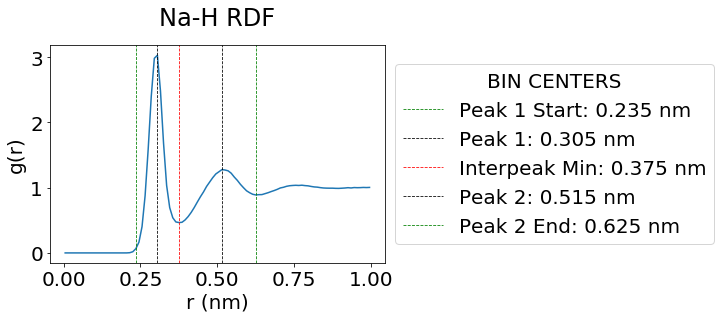

In [138]:
plt.plot(NaH_bin_centers, NaH_values)

pk1_indx = np.where(NaH_values == max(NaH_values))[0]
pk1_max = NaH_bin_centers[pk1_indx][0]

pk2_indx = np.where(NaH_values == max(NaH_values[40:]))[0]
pk2_max = NaH_bin_centers[pk2_indx][0]

pk12_min = NaH_bin_centers[np.where(NaH_values == min(NaH_values[pk1_indx[0]:pk2_indx[0]]))][0]

#nzero_indx = np.nonzero(NaH_values)
#closest_val = NaH_bin_centers[nzero_indx[0][0]]
closest_val = NaH_bin_centers[np.where(NaH_values > 0.1)[0]-1][0]

pk2_end_indx = np.where(NaH_values == min(NaH_values[pk2_indx[0]:]))[0]
pk2_end = NaH_bin_centers[pk2_end_indx][0]

plt.axvline(x=closest_val, color="green", lw=0.8, ls='--', label="Peak 1 Start: %1.3f nm" %closest_val)
plt.axvline(x=pk1_max, color="black", lw=0.8, ls='--', label="Peak 1: %1.3f nm" %pk1_max)
plt.axvline(x=pk12_min, color="red", lw=0.8, ls='--', label="Interpeak Min: %1.3f nm" %pk12_min)
plt.axvline(x=pk2_max, color="black", lw=0.8, ls='--', label="Peak 2: %1.3f nm" %pk2_max)
plt.axvline(x=pk2_end, color="green", lw=0.8, ls='--', label="Peak 2 End: %1.3f nm" %pk2_end)


plt.rcParams.update({'font.size': 20})
plt.title("Na-H RDF", pad=20)
plt.xlabel("r (nm)")
plt.ylabel("g(r)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop = {'size': 20}, title="BIN CENTERS")

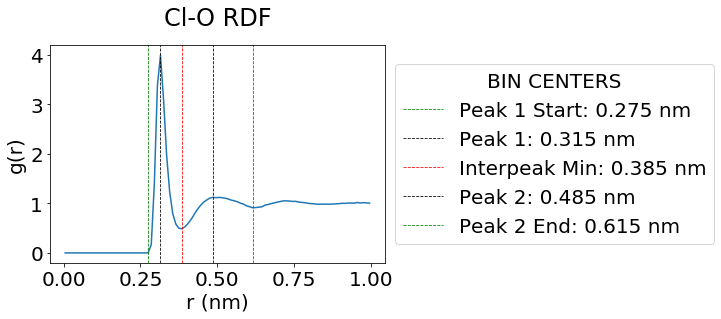

In [139]:
plt.plot(ClO_bin_centers, ClO_values)

pk1_indx = np.where(ClO_values == max(ClO_values))[0]
pk1_max = ClO_bin_centers[pk1_indx][0]

pk2_indx = np.where(ClO_values == max(ClO_values[40:]))[0]
pk2_max = ClO_bin_centers[pk2_indx][0]

pk12_min = ClO_bin_centers[np.where(ClO_values == min(ClO_values[pk1_indx[0]:pk2_indx[0]]))][0]

#nzero_indx = np.nonzero(ClO_values)
#closest_val = ClO_bin_centers[nzero_indx[0][0]]
closest_val = ClO_bin_centers[np.where(ClO_values > 0.1)[0]-1][0]

pk2_end_indx = np.where(ClO_values == min(ClO_values[pk2_indx[0]:]))[0]
pk2_end = ClO_bin_centers[pk2_end_indx][0]

plt.axvline(x=closest_val, color="green", lw=0.8, ls='--', label="Peak 1 Start: %1.3f nm" %closest_val)
plt.axvline(x=pk1_max, color="black", lw=0.8, ls='--', label="Peak 1: %1.3f nm" %pk1_max)
plt.axvline(x=pk12_min, color="red", lw=0.8, ls='--', label="Interpeak Min: %1.3f nm" %pk12_min)
plt.axvline(x=pk2_max, color="black", lw=0.8, ls='--', label="Peak 2: %1.3f nm" %pk2_max)
plt.axvline(x=pk2_end, color="green", lw=0.8, ls='--', label="Peak 2 End: %1.3f nm" %pk2_end)


plt.rcParams.update({'font.size': 20})
plt.title("Cl-O RDF", pad=20)
plt.xlabel("r (nm)")
plt.ylabel("g(r)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop = {'size': 20}, title="BIN CENTERS")

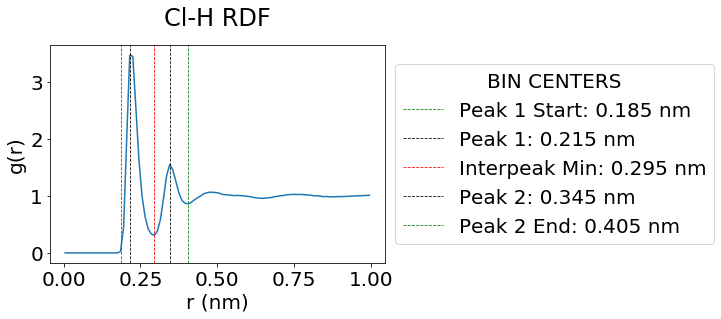

In [140]:
plt.plot(ClH_bin_centers, ClH_values)

pk1_indx = np.where(ClH_values == max(ClH_values))[0]
pk1_max = ClH_bin_centers[pk1_indx][0]

pk12_indx = np.where(ClH_values == min(ClH_values[pk1_indx[0]:pk2_indx[0]]))[0]
pk12_min = ClH_bin_centers[pk12_indx][0]

pk2_indx = np.where(ClH_values == max(ClH_values[pk12_indx[0]:]))[0]
pk2_max = ClH_bin_centers[pk2_indx][0]

#nzero_indx = np.nonzero(ClH_values)
#closest_val = ClH_bin_centers[nzero_indx[0][0]]
closest_val = ClH_bin_centers[np.where(ClH_values > 0.1)[0]-1][0]

pk2_end_indx = np.where(ClH_values == min(ClH_values[pk2_indx[0]:]))[0]
pk2_end = ClH_bin_centers[pk2_end_indx][0]

plt.axvline(x=closest_val, color="green", lw=0.8, ls='--', label="Peak 1 Start: %1.3f nm" %closest_val)
plt.axvline(x=pk1_max, color="black", lw=0.8, ls='--', label="Peak 1: %1.3f nm" %pk1_max)
plt.axvline(x=pk12_min, color="red", lw=0.8, ls='--', label="Interpeak Min: %1.3f nm" %pk12_min)
plt.axvline(x=pk2_max, color="black", lw=0.8, ls='--', label="Peak 2: %1.3f nm" %pk2_max)
plt.axvline(x=pk2_end, color="green", lw=0.8, ls='--', label="Peak 2 End: %1.3f nm" %pk2_end)


plt.rcParams.update({'font.size': 20})
plt.title("Cl-H RDF", pad=20)
plt.xlabel("r (nm)")
plt.ylabel("g(r)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop = {'size': 20}, title="BIN CENTERS")

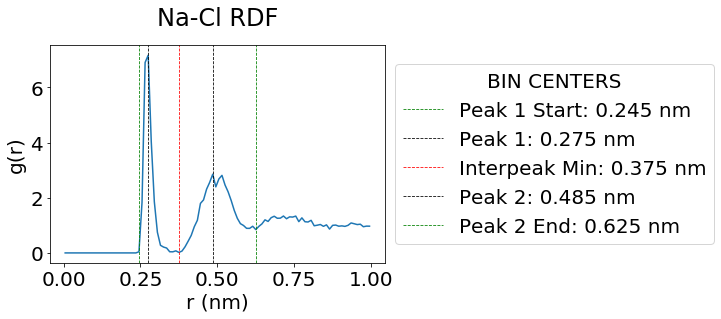

In [134]:
plt.plot(NaCl_bin_centers, NaCl_values)

pk1_indx = np.where(NaCl_values == max(NaCl_values))[0]
pk1_max = NaCl_bin_centers[pk1_indx][0]

pk12_indx = np.where(NaCl_values == min(NaCl_values[pk1_indx[0]:pk2_indx[0]]))[0]
pk12_min = NaCl_bin_centers[pk12_indx][0]

pk2_indx = np.where(NaCl_values == max(NaCl_values[pk12_indx[0]:]))[0]
pk2_max = NaCl_bin_centers[pk2_indx][0]

#nzero_indx = np.nonzero(NaCl_values)
#closest_val = NaCl_bin_centers[nzero_indx[0][0]]
closest_val = NaCl_bin_centers[np.where(NaCl_values > 0.1)[0]-1][0]

pk2_end_indx = np.where(NaCl_values == min(NaCl_values[pk2_indx[0]:]))[0]
pk2_end = NaCl_bin_centers[pk2_end_indx][0]

plt.axvline(x=closest_val, color="green", lw=0.8, ls='--', label="Peak 1 Start: %1.3f nm" %closest_val)
plt.axvline(x=pk1_max, color="black", lw=0.8, ls='--', label="Peak 1: %1.3f nm" %pk1_max)
plt.axvline(x=pk12_min, color="red", lw=0.8, ls='--', label="Interpeak Min: %1.3f nm" %pk12_min)
plt.axvline(x=pk2_max, color="black", lw=0.8, ls='--', label="Peak 2: %1.3f nm" %pk2_max)
plt.axvline(x=pk2_end, color="green", lw=0.8, ls='--', label="Peak 2 End: %1.3f nm" %pk2_end)


plt.rcParams.update({'font.size': 20})
plt.title("Na-Cl RDF", pad=20)
plt.xlabel("r (nm)")
plt.ylabel("g(r)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop = {'size': 20}, title="BIN CENTERS")

In [89]:
pk1_indx = np.where(NaO_values == max(NaO_values))[0]
pk1_max = NaO_bin_centers[pk1_indx][0]
pk2_indx = np.where(NaO_values == max(NaO_values[40:]))[0][0]
#pk2_max = NaO_bin_centers[pk2_indx][0]
#pk12_min = NaO_bin_centers[np.where(NaO_values == min(NaO_values[pk1_indx:pk2_indx]))][0]
pk1_indx

array([23])

In [64]:
tmp_list = []
for i in range(1,len(NaO_values)):
    if NaO_values[i] > NaO_values[i-1]:
        tmp_list.append(1)
    else:
        tmp_list.append(0)

In [25]:
np.nonzero(tmp_list)

(array([19, 20, 21, 22, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
        44, 45, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 71,
        74, 79, 80, 82, 83, 86, 89, 92]),)

In [48]:
NaO_bin_centers[np.where(NaO_values == max(NaO_values))][0]

0.235

In [26]:
NaO_bin_centers[56]

0.565

In [30]:
nzero_indx = np.nonzero(NaH_values)
NaH_bin_centers[nzero_indx[0][0]]

0.205

In [32]:
NaH_values

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.74689017e-04, 3.22932932e-03, 1.80789202e-02, 6.50966391e-02,
       1.65568626e-01, 4.02402934e-01, 8.77225102e-01, 1.58926072e+00,
       2.39894676e+00, 2.98470640e+00, 3.03136716e+00, 2.48299937e+00,
       1.68136848e+00, 1.03607658e+00, 6.94652840e-01, 5.39432340e-01,
       4.75120692e-01, 4.65401226e-01, 4.69758491e-01, 5.05411300e-01,
       5.57085763e-01, 6.21925175e-01, 6.97620529e-01, 7.81021737e-01,
       8.61663767e-01, 9.35535384e-01, 1.01966647e+00, 1.08699757e+00,
       1.15393530e+00, 1.21072097e+00, 1.24422995e+00, 1.27754931e+00,
       1.27134746e+00, 1.25894137e+00, 1.22248712e+00, 1.16368657e+00,
      

In [33]:
NaO_values

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       6.98756069e-04, 2.34841064e-01, 3.49812605e+00, 7.95082994e+00,
       6.41930071e+00, 3.18030796e+00, 1.37389649e+00, 6.12080579e-01,
       3.06847282e-01, 1.79082946e-01, 1.28491683e-01, 1.07194025e-01,
       1.11867250e-01, 1.26268357e-01, 1.73503853e-01, 2.31215806e-01,
       3.27769531e-01, 4.40356823e-01, 5.85076357e-01, 7.43434611e-01,
       9.23597016e-01, 1.07587769e+00, 1.22245176e+00, 1.30982560e+00,
       1.38645837e+00, 1.42953647e+00, 1.43400537e+00, 1.40912877e+00,
       1.37484186e+00, 1.29424721e+00, 1.19511182e+00, 1.10339760e+00,
       1.02384798e+00, 9.55604462e-01, 9.08967190e-01, 8.81958281e-01,
      

In [17]:
NaO_bin_centers[46]

0.465

In [29]:
NaO_bin_centers[23]

0.235

In [34]:
(0.23+0.46)/2

0.34500000000000003

In [27]:
max(NaO_values)

7.950829936103635

In [31]:
np.where(NaH_values == max(NaH_values))

(array([30]),)

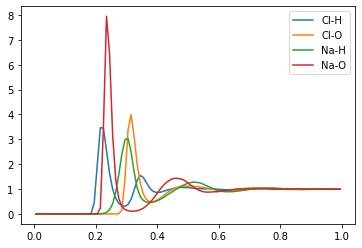

In [12]:
plt.plot(ClH_bin_centers, ClH_values, label="Cl-H")
plt.plot(ClO_bin_centers, ClO_values, label="Cl-O")
plt.plot(NaH_bin_centers, NaH_values, label="Na-H")
plt.plot(NaO_bin_centers, NaO_values, label="Na-O")
plt.legend()

In [35]:
NaCl_pairs = trj.top.select_pairs("name NA", "name CL")

NaCl_bin_centers, NaCl_values = md.compute_rdf(trj, NaCl_pairs, n_bins=100)

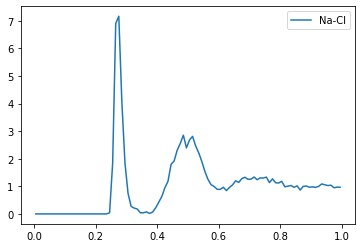

In [36]:
plt.plot(NaCl_bin_centers, NaCl_values, label="Na-Cl")
plt.legend()

In [38]:
np.where(NaCl_values == max(NaCl_values))

(array([27]),)

In [39]:
np.where(NaCl_values == max(NaCl_values[40:]))

(array([48]),)

In [46]:
nonzero = np.nonzero(NaCl_values)
NaCl_bin_centers[nonzero[0][0]]

0.245

In [41]:
NaCl_bin_centers[27]

0.275

In [44]:
NaCl_bin_centers[48]

0.485

In [45]:
(0.27+0.48)/2

0.375

In [4]:
NaO_pairs = trj.top.select_pairs("name NA", "name O")

NaO_bin_centers, NaO_values = md.compute_rdf(trj, NaO_pairs, n_bins=100)

NaH_pairs = trj.top.select_pairs("name NA", "name H1 or name H2")

NaH_bin_centers, NaH_values = md.compute_rdf(trj, NaH_pairs, n_bins=100)

In [76]:
Na_water_values = (NaO_values + NaH_values)/2

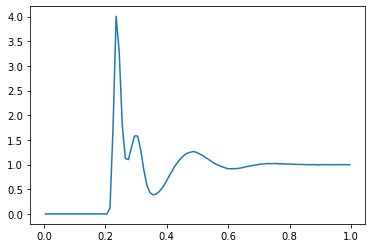

In [77]:
plt.plot(NaH_bin_centers, Na_water_values)

In [82]:
pwd

'/project2/andrewferguson/Nick/MESA/GenPIV/NaCL_unbiased_NVT/3_md'

In [75]:
Na_water_values

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       8.73445086e-04, 2.38070393e-01, 3.51620497e+00, 8.01592658e+00,
       6.58486934e+00, 3.58271090e+00, 2.25112159e+00, 2.20134130e+00,
       2.70579404e+00, 3.16378935e+00, 3.15985885e+00, 2.59019339e+00,
       1.79323573e+00, 1.16234493e+00, 8.68156693e-01, 7.70648145e-01,
       8.02890223e-01, 9.05758049e-01, 1.05483485e+00, 1.24884591e+00,
       1.48068278e+00, 1.69780286e+00, 1.92007229e+00, 2.09084734e+00,
       2.24812214e+00, 2.36507185e+00, 2.45367184e+00, 2.49612634e+00,
       2.52877717e+00, 2.50496817e+00, 2.43934177e+00, 2.38094691e+00,
       2.29519544e+00, 2.21454583e+00, 2.13145431e+00, 2.04564485e+00,
      

In [72]:
NaH_values

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.74689017e-04, 3.22932932e-03, 1.80789202e-02, 6.50966391e-02,
       1.65568626e-01, 4.02402934e-01, 8.77225102e-01, 1.58926072e+00,
       2.39894676e+00, 2.98470640e+00, 3.03136716e+00, 2.48299937e+00,
       1.68136848e+00, 1.03607658e+00, 6.94652840e-01, 5.39432340e-01,
       4.75120692e-01, 4.65401226e-01, 4.69758491e-01, 5.05411300e-01,
       5.57085763e-01, 6.21925175e-01, 6.97620529e-01, 7.81021737e-01,
       8.61663767e-01, 9.35535384e-01, 1.01966647e+00, 1.08699757e+00,
       1.15393530e+00, 1.21072097e+00, 1.24422995e+00, 1.27754931e+00,
       1.27134746e+00, 1.25894137e+00, 1.22248712e+00, 1.16368657e+00,
      

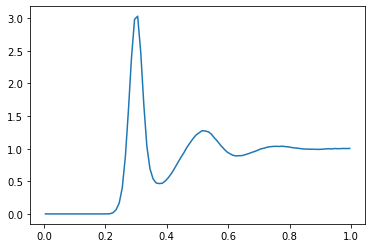

In [73]:
plt.plot(NaH_bin_centers, NaH_values)

In [69]:
NaO_pairs

array([[1524,    0],
       [1524,    3],
       [1524,    6],
       ...,
       [1524, 1515],
       [1524, 1518],
       [1524, 1521]], dtype=int32)

In [ ]:
NaO_pairs = trj.top.select_pairs("name NA", "name O")

NaO_bin_centers, NaO_values = md.compute_rdf(trj, NaO_pairs, n_bins=100)

In [62]:
NaO_bin_centers

array([0.005     , 0.015     , 0.025     , 0.035     , 0.045     ,
       0.055     , 0.065     , 0.075     , 0.085     , 0.095     ,
       0.105     , 0.11499999, 0.125     , 0.13499999, 0.14500001,
       0.155     , 0.16499999, 0.17500001, 0.185     , 0.195     ,
       0.205     , 0.215     , 0.225     , 0.235     , 0.245     ,
       0.255     , 0.265     , 0.275     , 0.285     , 0.29500002,
       0.305     , 0.315     , 0.325     , 0.335     , 0.345     ,
       0.35500002, 0.365     , 0.375     , 0.385     , 0.39499998,
       0.405     , 0.415     , 0.425     , 0.435     , 0.445     ,
       0.45499998, 0.465     , 0.475     , 0.485     , 0.495     ,
       0.505     , 0.515     , 0.525     , 0.53499997, 0.545     ,
       0.555     , 0.565     , 0.575     , 0.585     , 0.595     ,
       0.605     , 0.615     , 0.625     , 0.635     , 0.645     ,
       0.655     , 0.665     , 0.675     , 0.685     , 0.695     ,
       0.705     , 0.71500003, 0.725     , 0.735     , 0.745  

In [63]:
NaO_values

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       6.98756069e-04, 2.34841064e-01, 3.49812605e+00, 7.95082994e+00,
       6.41930071e+00, 3.18030796e+00, 1.37389649e+00, 6.12080579e-01,
       3.06847282e-01, 1.79082946e-01, 1.28491683e-01, 1.07194025e-01,
       1.11867250e-01, 1.26268357e-01, 1.73503853e-01, 2.31215806e-01,
       3.27769531e-01, 4.40356823e-01, 5.85076357e-01, 7.43434611e-01,
       9.23597016e-01, 1.07587769e+00, 1.22245176e+00, 1.30982560e+00,
       1.38645837e+00, 1.42953647e+00, 1.43400537e+00, 1.40912877e+00,
       1.37484186e+00, 1.29424721e+00, 1.19511182e+00, 1.10339760e+00,
       1.02384798e+00, 9.55604462e-01, 9.08967190e-01, 8.81958281e-01,
      

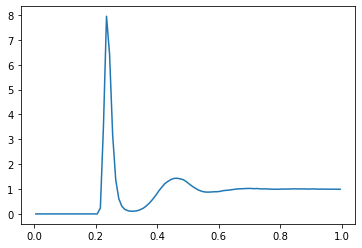

In [59]:
plt.plot(*NaO_rdf)

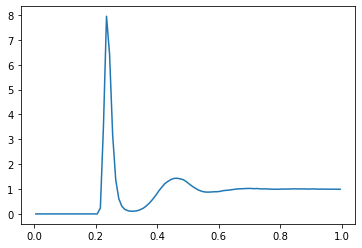

In [64]:
plt.plot(NaO_bin_centers, NaO_values)

In [58]:
ClO_pairs = trj.top.select_pairs("name CL", "name O")

ClO_rdf = md.compute_rdf(trj, ClO_pairs, n_bins=100)

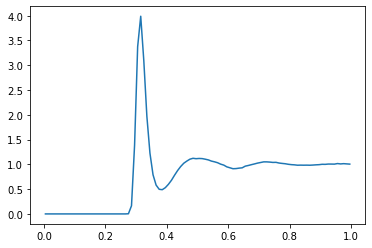

In [60]:
plt.plot(*ClO_rdf)

In [27]:
ions_rdf = getRDF(ions_trj)

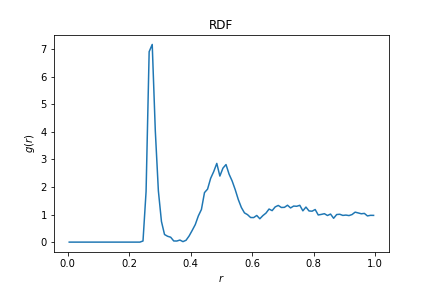

<Figure size 432x288 with 0 Axes>

In [28]:
ions_rdf